root ipython in tensorly folder. No need if tensorly installed with pip with optimization module support.

In [1]:
cd ~/Online/tensorly

/home/jecohen/Online/tensorly


In [2]:
import time
import matplotlib.pyplot as plt
import tensorly as tl
import numpy as np
from scipy.misc import face, imresize
from math import ceil

Using numpy backend.


In [3]:
import tensorly.contrib.optimization.optim_parafac as paraclass

In [4]:
random_state = 12345

image = tl.tensor(imresize(face(), 0.3), dtype='float64')

def to_image(tensor):
    """A convenience function to convert from a float dtype back to uint8"""
    im = tl.to_numpy(tensor)
    im -= im.min()
    im /= im.max()
    im *= 255
    return im.astype(np.uint8)

# Rank of the CP decomposition
cp_rank = 25



/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Testing the ALS algorithm and the class definition

In [5]:
# Perform the CP decomposition
    # Fixed mode test
fixed = [2];
    # Constraints test
constraints = []    
    # creating the class instance
model = paraclass.Parafac(rank=cp_rank, verbose=False, init='random',
                          random_state=random_state, fixed_modes = fixed,
                         n_iter_max=100, constraints = constraints)

In [6]:
factors, errors = model.fit(image)

In [7]:
errors[-1]

0.13835249072542286

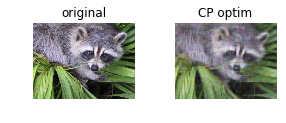

In [8]:
# Reconstruct the image from the factors
cp_reconstruction = model.reconstruct();


# plotting original and reconstructions
# Plotting the original and reconstruction from the decompositions
fig = plt.figure()
ax = fig.add_subplot(2, 3, 1)
ax.set_axis_off()
ax.imshow(to_image(image))
ax.set_title('original')

ax = fig.add_subplot(2, 3, 2)
ax.set_axis_off()
ax.imshow(to_image(cp_reconstruction))
ax.set_title('CP optim')

plt.tight_layout()
plt.show()

# Testing Fast Gradient

In [9]:
# Perform the CP decomposition
    # Choosing the Fast Gradient optimization method
algo = 'FG'    
    # Choosing stepsize
step = 1e-6 
    # Fixed mode test
fixed = [2];
    # Constraints test
#constraints = ['NN','NN','NN']    
constraints = []
    # creating the class instance
model2 = paraclass.Parafac(rank=cp_rank, verbose=False, init='random',
                          random_state=random_state, fixed_modes = fixed,
                         n_iter_max=1000, constraints = constraints,
                         method = algo, step = step)

In [10]:
factor_fg, errors_fg = model2.fit(image)

In [11]:
errors_fg[-1]

0.15839407575426892

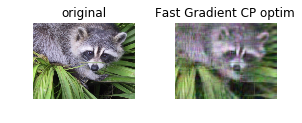

In [12]:
# Reconstruct the image from the factors
cp_reconstruction = model2.reconstruct();


# plotting original and reconstructions
# Plotting the original and reconstruction from the decompositions
fig = plt.figure()
ax = fig.add_subplot(2, 3, 1)
ax.set_axis_off()
ax.imshow(to_image(image))
ax.set_title('original')

ax = fig.add_subplot(2, 3, 2)
ax.set_axis_off()
ax.imshow(to_image(cp_reconstruction))
ax.set_title('Fast Gradient CP optim')

plt.tight_layout()
plt.show()